In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Downloads/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class', axis=1)
y = df['class']

In [5]:
y = y.map({'p': 'Posionous', 'e': 'Edible'})

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [7]:
cat_cols= X.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print (f" col name : {col}, N Unique : {X[col].nunique()}")

 col name : cap-shape, N Unique : 6
 col name : cap-surface, N Unique : 4
 col name : cap-color, N Unique : 10
 col name : bruises, N Unique : 2
 col name : odor, N Unique : 9
 col name : gill-attachment, N Unique : 2
 col name : gill-spacing, N Unique : 2
 col name : gill-size, N Unique : 2
 col name : gill-color, N Unique : 12
 col name : stalk-shape, N Unique : 2
 col name : stalk-root, N Unique : 5
 col name : stalk-surface-above-ring, N Unique : 4
 col name : stalk-surface-below-ring, N Unique : 4
 col name : stalk-color-above-ring, N Unique : 9
 col name : stalk-color-below-ring, N Unique : 9
 col name : veil-type, N Unique : 1
 col name : veil-color, N Unique : 4
 col name : ring-number, N Unique : 3
 col name : ring-type, N Unique : 5
 col name : spore-print-color, N Unique : 9
 col name : population, N Unique : 6
 col name : habitat, N Unique : 7


In [8]:
for col in cat_cols:
    X[col]=X[col].astype("category")
    X[col]=X[col].cat.codes

In [9]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [25]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [27]:
X_std = StandardScaler().fit_transform(X)
X_std

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

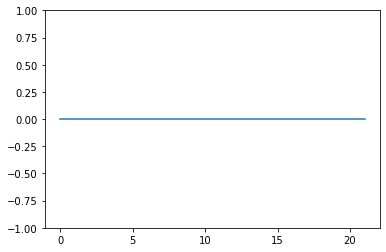

In [28]:
plt.ylim(-1,1)
means=[]
for i in range(X.shape[1]):
    means.append(np.mean(X_std[:,1]))
plt.plot(means)

In [29]:
X_pca = PCA(n_components=2).fit_transform(X_std)

In [30]:
X_pca

array([[-0.57432158, -0.97577403],
       [-2.28210248,  0.27905757],
       [-1.85803565, -0.27097567],
       ...,
       [-1.62151618, -0.7575378 ],
       [ 3.67060587, -1.03277015],
       [-1.57520273, -1.22858047]])

In [31]:
X_pca = np.vstack((X_pca.T, y)).T

In [32]:
X_pca

array([[-0.5743215791083144, -0.975774033174385, 'Posionous'],
       [-2.282102481476607, 0.27905757411059323, 'Edible'],
       [-1.8580356518262817, -0.2709756705510219, 'Edible'],
       ...,
       [-1.6215161788040007, -0.7575377970535869, 'Edible'],
       [3.6706058742103895, -1.0327701493538786, 'Posionous'],
       [-1.575202725642018, -1.2285804670493963, 'Edible']], dtype=object)

In [33]:
df_pca = pd.DataFrame(X_pca, columns=['1st_Component',
                                      '2nd_Component',
                                      'class'])

In [34]:
df_pca.head()

,1st_Component,2nd_Component,class
0,-0.574322,-0.975774,Posionous
1,-2.2821,0.279058,Edible
2,-1.85804,-0.270976,Edible
3,-0.88478,-0.756464,Posionous
4,0.689614,1.23927,Edible


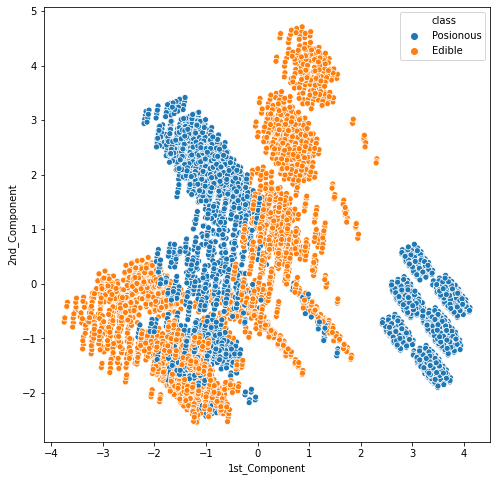

In [35]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_pca, hue='class', x='1st_Component', y='2nd_Component')
plt.show()

In [37]:
from sklearn.manifold import TSNE

In [111]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000)
X_tsne = tsne.fit_transform(X_std)
X_tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])

In [112]:
df_tsne.head()

,Dim1,Dim2,class
0,1.41005,-7.22269,Posionous
1,19.9033,20.7379,Edible
2,-1.05119,54.5021,Edible
3,1.58425,-10.6037,Posionous
4,-23.9968,130.837,Edible


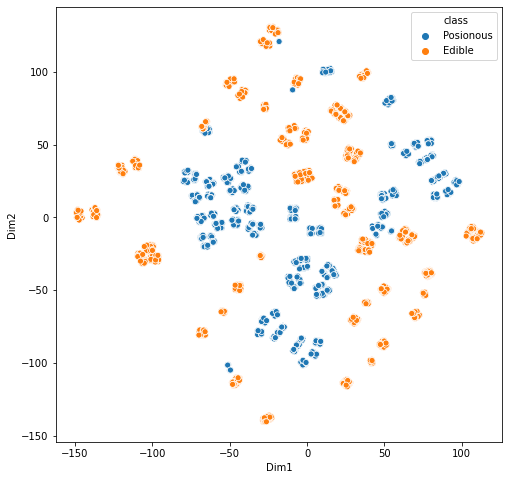

In [113]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2')
plt.show()